In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision

### 1. Load + Preprocess MNIST Dataset

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

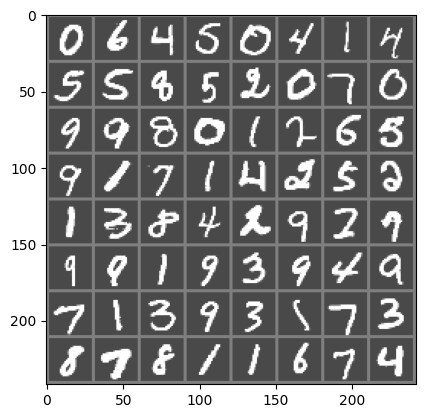

    0     6     4     5     0     4     1     4


In [13]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join('%5s' % labels[j].item() for j in range(8)))

### 2. Define Neural Network


In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.log_softmax(x, dim=1)

model = SimpleNN()

### 3. Training the Model

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data, target
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.09804995357990265
Epoch 2/10, Loss: 0.23620231449604034
Epoch 3/10, Loss: 0.023058738559484482
Epoch 4/10, Loss: 0.02985483594238758
Epoch 5/10, Loss: 0.0018548942171037197
Epoch 6/10, Loss: 0.005144407972693443
Epoch 7/10, Loss: 0.018096163868904114
Epoch 8/10, Loss: 0.0046063680201768875
Epoch 9/10, Loss: 0.061633676290512085
Epoch 10/10, Loss: 0.00030049431370571256


### 4. Evaluating the Model

In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data, target
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 97.92%
